In [1]:
import TubeClass
import numpy as np
from scipy.integrate import solve_ivp,solve_bvp
from scipy.optimize import fsolve
import matplotlib.pyplot as plt
import sympy as sym
from sympy.solvers import ode
import math

# INIT

In [3]:
def Euler_init(P0=1e5):
  global l,P,Jx,E,delta,l1,n,alpha,P_equal
  Jx = np.pi * 0.5**4 / 64 * (1 - 0.49**4 / 0.5**4) #1 / 2 * m / l * (0.5**2 + 0.49**2)**2 #момент инерции
  E = 2.06 * 10**11 #модуль Юнга

  #P = n*np.pi*E*Jx/l**2 #сила сжатия трубы
  P = P0
  l = 10
  P_equal = np.pi**2*E*Jx/l**2
  n = np.sqrt(P/P_equal)
  delta = 0.1

  alpha = np.sqrt(P/(E*Jx))

  l1 = np.pi/alpha

  #l1 = np.pi/(np.sqrt(P/(E*Jx)))

  #l = np.sqrt(np.pi**2*E*Jx/P) #длина трубы


  #print(np.pi/alpha)

# **Феодосьев**

19369426.0902187 4842356.522554675
5.0 10 2.0 19369426.0902187
0.6283185307179586


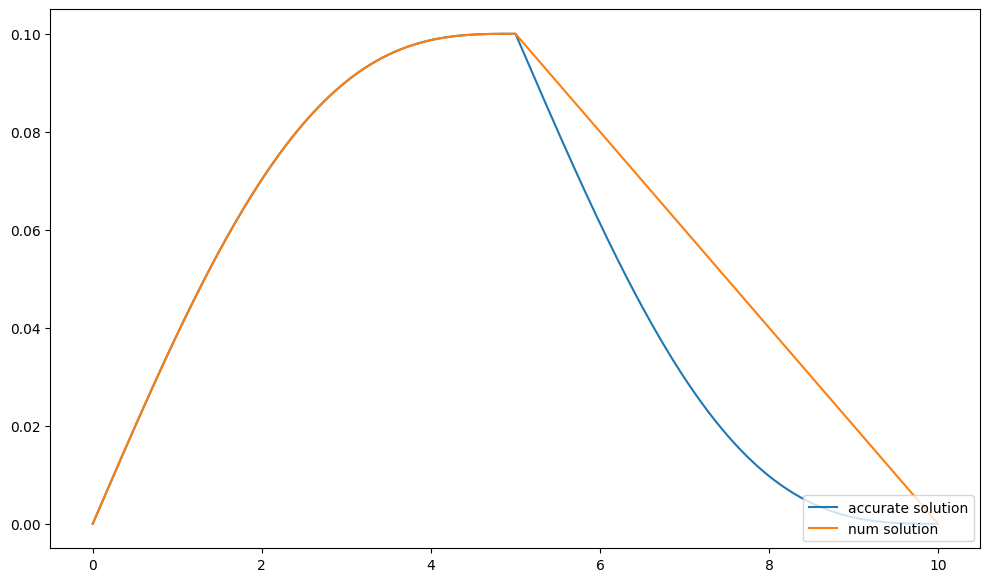

5.0


In [3]:
Euler_init()
n = 2
f = lambda P: np.sqrt(P/P_equal) - n
temp, = fsolve(f,P_equal) 
print(temp,P_equal)
Euler_init(temp)
print(l1,l,n,P)
print(alpha)
def Euler_fun1(x,w):
  return np.vstack((w[1],-delta*np.pi/l1**2*np.sin(alpha*x)))
# def Euler_fun3(x,w):
#   return  np.vstack((w[1],delta*np.pi/l1**2*np.sin(alpha*x)))
# def Euler_fun3(x,w):
#   return  np.vstack((w[1],delta*np.pi/l1**2*(np.sin(alpha*x)-np.pi*np.cos(alpha*x))))
def Euler_fun3(x,w):
  return  np.vstack((w[1],delta/2*alpha**2/E/Jx*((1-1/(l1*alpha))*np.exp(alpha*x)+ (1+1/(l1*alpha))*np.exp(-alpha*x))))
# Краевые условия
def bc_E0(ya, yb): # шарниры
  return np.array([ya[0], yb[0]-delta])
def bc_E1(ya, yb): # шарниры
  return np.array([ya[0]-delta, yb[0]])

totalNodes = 10000
x1 = np.linspace(0, l1, totalNodes)
y1 = np.array(delta/np.pi*(np.sin(alpha*x1)+alpha*x1))
x2 = np.linspace(l1, l-l1, totalNodes)
y2 = np.array(y1[-1]*(1-x2+x2))
x3 = np.linspace(l-l1, l, totalNodes)
y3 = np.array(delta-delta/np.pi*(np.sin(alpha*x1)+alpha*x1))
x = np.hstack([x1,x2,x3])
y = np.hstack([y1,y2,y3])

plt.figure(figsize=(12,7))
plt.plot(x,y,label='accurate solution')
plt.legend(loc='lower right')

w1 = np.zeros((2, x1.shape[0]))
w3 = np.zeros((2, x3.shape[0]))
solbc1 = solve_bvp(Euler_fun1,bc_E0,x1,w1, tol = 1e-10, max_nodes=totalNodes)
solbc3 = solve_bvp(Euler_fun3,bc_E1,x1,w3, tol = 1e-10, max_nodes=totalNodes)
w1 = solbc1.y[0]
w2 = w1[-1]*np.ones(x2.shape[0])
w3 = solbc3.y[0]
w = np.hstack([w1,w2,w3])

plt.plot(x,w,label='num solution')
plt.legend(loc='lower right')
plt.show()
print(l1)


# Вариант Овчинникова

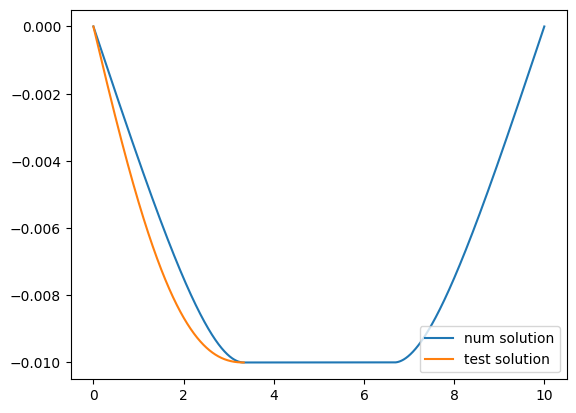

In [12]:
Euler_init()
n = 3
f = lambda P: np.sqrt(P/P_equal) - n
temp, = fsolve(f,P_equal) 
Euler_init(temp)
def Euler_fun(x,w):
  return np.vstack((w[1],w[2],w[3],P/(E*Jx)*w[2]))
# Краевые условия
def bc_ER(ya, yb): # шарниры
  return np.array([ya[0], yb[0]+delta,ya[2],yb[1]])
def bc_EL(ya, yb): # шарниры
  return np.array([ya[0]+delta, yb[0],ya[1],yb[2]])
totalNodes = 1000
x1 = np.linspace(0, l1, totalNodes)
x2 = np.linspace(l1, l-l1, totalNodes)
x3 = np.linspace(l-l1, l, totalNodes)
x = np.hstack([x1,x2,x3])

delta = 0.01

w1 = np.zeros((4, x1.shape[0]))
w3 = np.zeros((4, x3.shape[0]))
solbc1 = solve_bvp(Euler_fun,bc_ER,x1,w1, tol = 1e-10, max_nodes=totalNodes)
solbc3 = solve_bvp(Euler_fun,bc_EL,x1,w3, tol = 1e-10, max_nodes=totalNodes)
w1 = solbc1.y[0]
w2 = w1[-1]*np.ones(x2.shape[0])
w3 = solbc3.y[0]
w = np.hstack([w1,w2,w3])
plt.plot(x,w,label='num solution')
plt.legend(loc='lower right')
#plt.ylim(0

w1 = np.zeros((4, x1.shape[0]))
def Euler_fun(x,w):
  return np.vstack((w[1],w[2],w[3],P/(E*Jx)*w[2]-7800*2*9.8/(E*Jx)))
solbc1 = solve_bvp(Euler_fun,bc_ER,x1,w1, tol = 1e-10, max_nodes=totalNodes)
w1 = solbc1.y[0]
plt.plot(x1,w1,label='test solution')
plt.legend(loc='lower right')
plt.show()


# Урманчеевский вариант

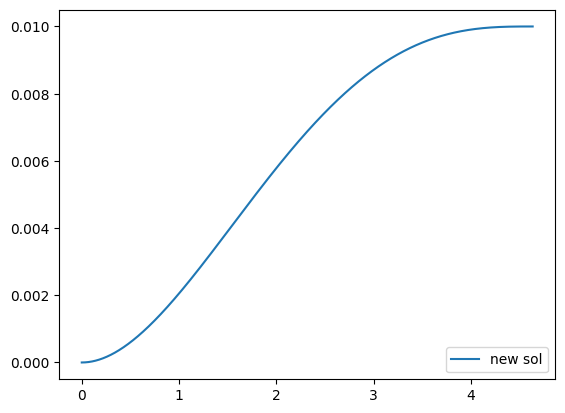

In [5]:
rhol = 7800
g = 9.81
l = np.power(72*(E*Jx)*delta/(rhol*g),1/4)
totalNodes = 10000
x1 = np.linspace(0, l, totalNodes)
y1 = np.array(rhol*g/(E*Jx)*(x1**4/24-l/9*x1**3+l**2/12*x1**2))
plt.plot(x1,y1,label='new sol')
plt.legend(loc='lower right')
plt.show()

# Класс

## Сегмент с прилеганием

In [39]:
class Rod():
   dict_id_dimensions = {1:4,2:4}
   bc_id_dimensions = {0:4}
   def __init__(self,l=20,n=1,delta=0.1,task_id = 1,bc_id=1,totalNodes=1000):
      self.__l = l
      self.__n = 2 if 1<=n<=2 else n
      self.__delta = delta
      self.__task_id = task_id
      self.__bc_id = bc_id
      self.__totalNodes = totalNodes
   @property
   def l(self):
      return self.__l
   @property
   def n(self):
      return self.__n
   @property
   def delta(self):
      return self.__delta
   @property
   def task_id(self):
      return self.__task_id
   @property
   def E(self):
      return 2.06 * 10**11
   @property
   def Jx(self):
      return np.pi * 0.5**4 / 64 * (1 - 0.49**4 / 0.5**4)
   @property
   def P_equal(self):
      return  np.pi**2*self.E*self.Jx/self.l**2
   @property
   def P(self):
      return self.P_equal*self.n**2
   @property
   def alpha(self):
      return np.sqrt(self.P/(self.E*self.Jx))
   @property
   def l1(self):
      return np.pi/self.alpha
      #return l/n
   @property
   def rhol(self):
      return 1000/self.l   
   def fun_maker(self):
      dict_fun = {1: lambda x,w : np.vstack((w[1],w[2],w[3],self.P/(self.E*self.Jx)*w[2])), 
                  2: lambda x,w : np.vstack((w[1],w[2],w[3],self.P/(self.E*self.Jx)*w[2]-self.rhol*9.8/(self.E*self.Jx)))}
      return  dict_fun[self.task_id]
   def bc_maker(self): # индекс 0 для левой части, индекс 1 для правой
      dict_bc = {1 : [lambda ya,yb : np.array([ya[0], yb[0]-self.delta,ya[2],yb[1]]),
                      lambda ya,yb : np.array([ya[0]-self.delta, yb[0],ya[1],yb[2]])]}
      return dict_bc[self.bc_id]
   @property
   def bc_id(self):
      return self.__bc_id
   @property
   def totalNodes(self):
      return self.__totalNodes
   @property
   def x(self):
      return [np.linspace(0, self.l1, self.totalNodes),np.linspace(self.l1, self.l-self.l1, self.totalNodes),
              np.linspace(self.l-self.l1, self.l, self.totalNodes)]
   @property
   def y(self):
      return [np.zeros((self.dict_id_dimensions[self.task_id], self.x[0].shape[0])),
              np.zeros((self.dict_id_dimensions[self.task_id], self.x[1].shape[0])),
              np.zeros((self.dict_id_dimensions[self.task_id], self.x[2].shape[0]))]
   @property
   def solution(self):
      s1 = solve_bvp(self.fun_maker(),self.bc_maker()[0],self.x[0],self.y[0], tol = 1e-10, max_nodes=self.totalNodes)
      s3 = solve_bvp(self.fun_maker(),self.bc_maker()[1],self.x[2],self.y[2], tol = 1e-10, max_nodes=self.totalNodes)
      w1 = s1.y[0]
      w2 = w1[-1]*np.ones(self.x[1].shape[0])
      w3 = s3.y[0]
      w = np.hstack([w1,w2,w3])
      return w
   @property
   def stacked_x(self):
      return np.hstack([self.x[0],self.x[1],self.x[2]])     
        

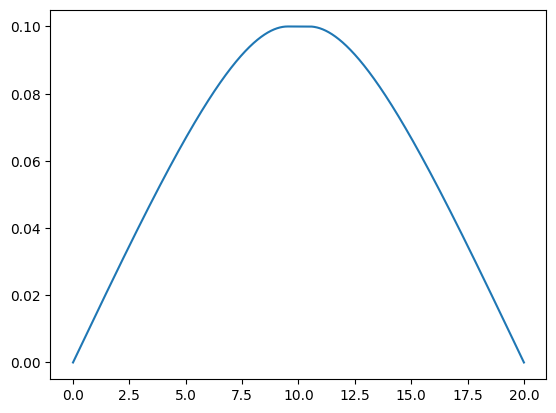

In [46]:
T1 = Rod(n=2.1)
plt.plot(T1.stacked_x,T1.solution)
plt.show()

## Общий класс

In [7]:

class CanalRod():
  dict_id_dimensions = {1:4,2:4}
  bc_id_dimensions = {0:4}
  def __init__(self,l=20,n=1,delta=0.1,task_id = 1,bc_id=1,totalNodes=1000):
    if l!=0:
      self.__l = abs(l)
    else:
      raise ValueError("L can't be 0")
    if n>0:
      self.__n = n
    else:
      raise ValueError("n can't be 0 or negative")
    if task_id in self.dict_id_dimensions.keys():
      self.__task_id = task_id
    else:
      raise ValueError('Wrong task_id')
    if bc_id in self.bc_id_dimensions.keys() and self.bc_id_dimensions[bc_id] == self.dict_id_dimensions[self.task_id]:
      self.__bc_id = bc_id
    else:
      print('bc_id and task_id doesnt match. Set it to default for this task_id')
      self.__bc_id = 1
  @property
  def l(self): # длина трубы
    return self.__l
  @l.setter
  def l(self,l):
    if l!=0:
      self.__l = abs(l)
    else:
      raise ValueError("L can't be 0")
  @property
  def n(self):
    return self.__n
  @n.setter
  def n(self,n):
    if n>0:
      self.__n = n
    else:
      raise ValueError("n can't be 0 or negative")
  def RodCount(self):
    if self.n<16:
      return 1
    else:
      i=0
      while self.n>=16*9**i:
        i+=1
      return 3**i
